<a href="https://colab.research.google.com/github/PotlachervuSrilatha/Data-Science_practice/blob/main/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression, LogisticRegression  # For linear and logistic regression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report  # For model evaluation


In [ ]:
data=pd.read_csv("/content/train.csv")
data.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [ ]:
data.shape

(90615, 10)

In [ ]:
data.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [ ]:
data.drop("id", axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.2+ MB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

The Sex column has to be in categorical datatype but was found to
be object  now i am Converting the sex into categorical.

In [ ]:
data["Sex"]=data["Sex"].astype("category")

In [ ]:
data.dtypes

Sex               category
Length             float64
Diameter           float64
Height             float64
Whole weight       float64
Whole weight.1     float64
Whole weight.2     float64
Shell weight       float64
Rings                int64
dtype: object

In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
data.mode()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,I,0.575,0.45,0.15,0.5805,0.096,0.1715,0.24,9


In [ ]:
data["Sex"].unique()

['F', 'I', 'M']
Categories (3, object): ['F', 'I', 'M']

In [ ]:
data["Sex"].value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

In [ ]:
data["Rings"].unique()

array([11,  6, 10,  9,  4,  8, 15,  7, 12, 20, 17, 13, 14,  5, 23,  3, 22,
       16, 18, 19, 21, 25,  1, 29,  2, 27, 24, 26])

In [ ]:
data["Rings"].value_counts()

Rings
9     17465
8     14499
10    12464
7      9008
11     8407
6      5411
12     4719
13     4074
5      2862
14     2507
15     2072
16     1439
4      1402
17     1175
18      848
19      639
20      507
3       386
21      255
23      180
22      108
27       41
2        29
24       29
1        25
29       24
25       22
26       18
Name: count, dtype: int64

In [ ]:
df = data.copy()

In [ ]:
df.select_dtypes(include='float64').describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


#**Univariate analysis :**

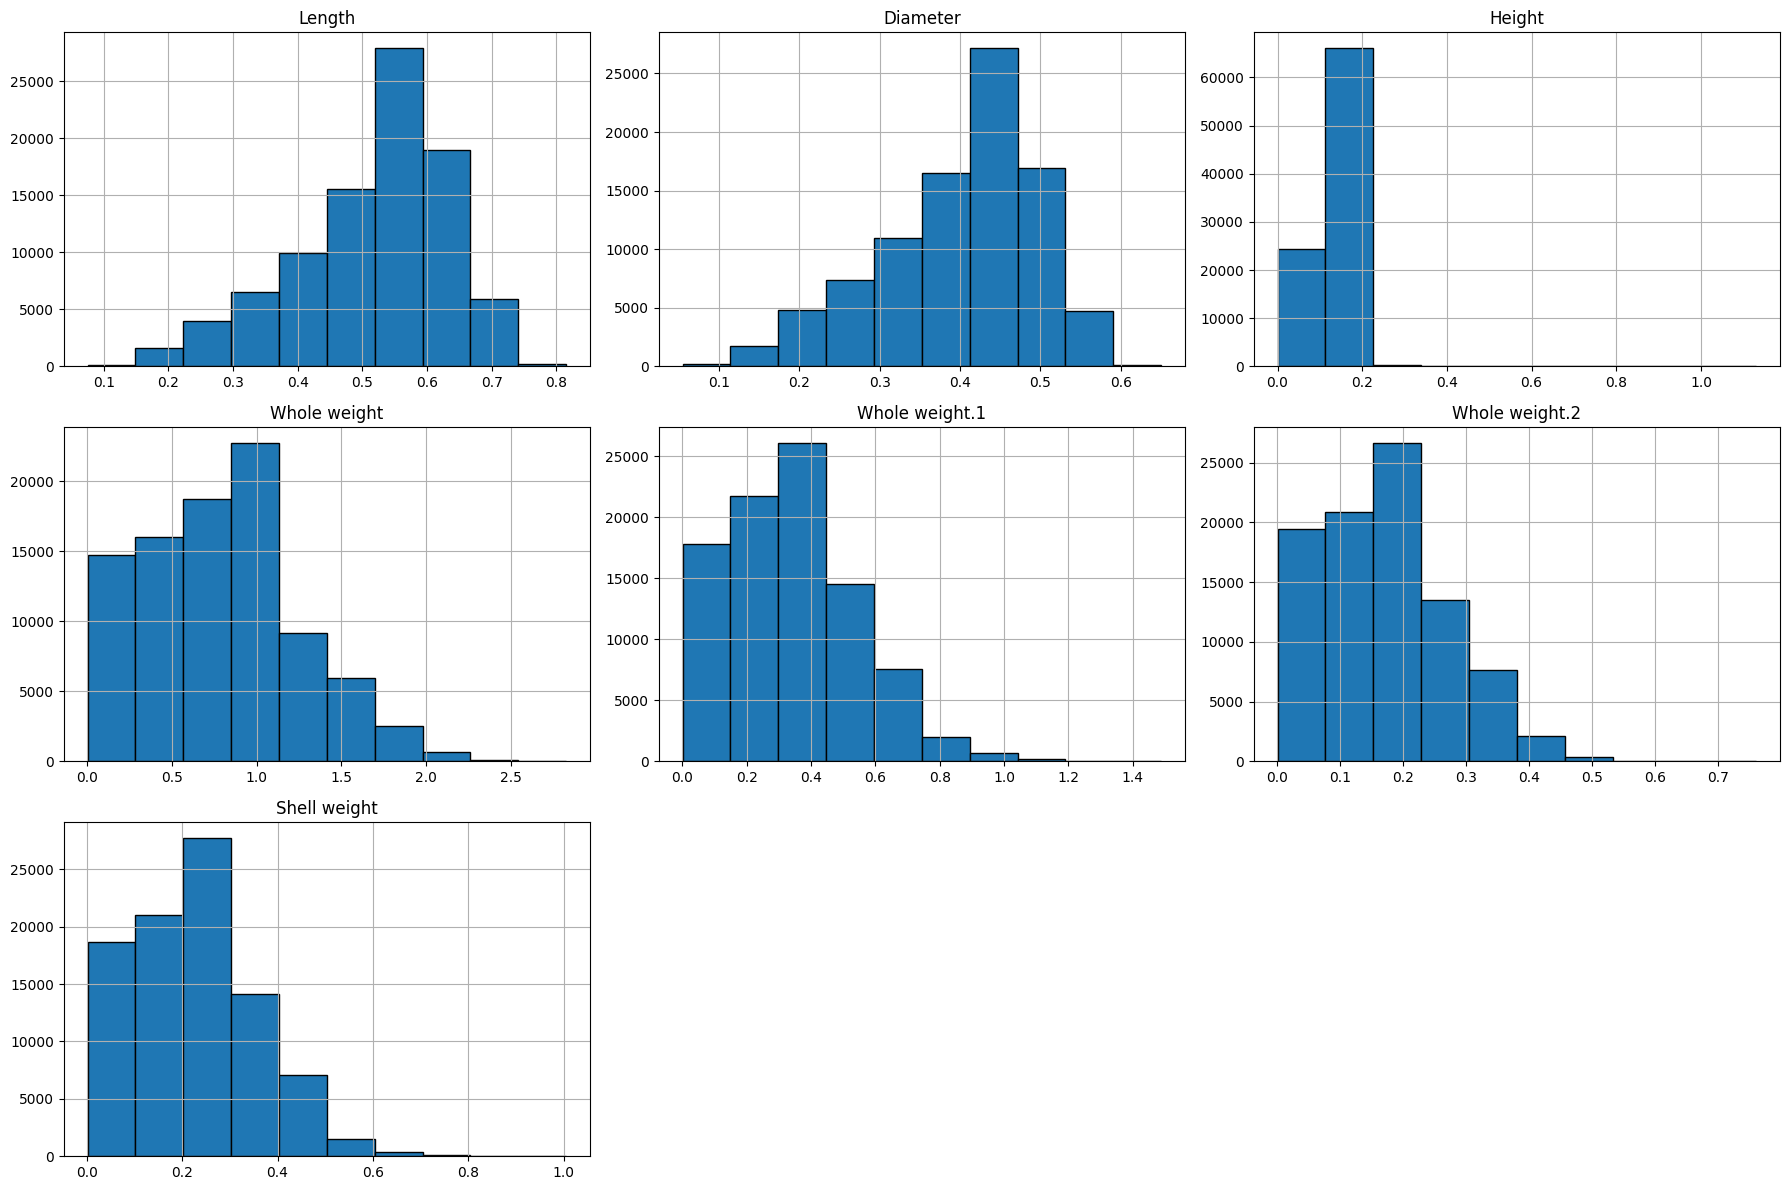

In [ ]:
df.select_dtypes(include='float64').hist(edgecolor='black', figsize=(18, 12))
plt.tight_layout()

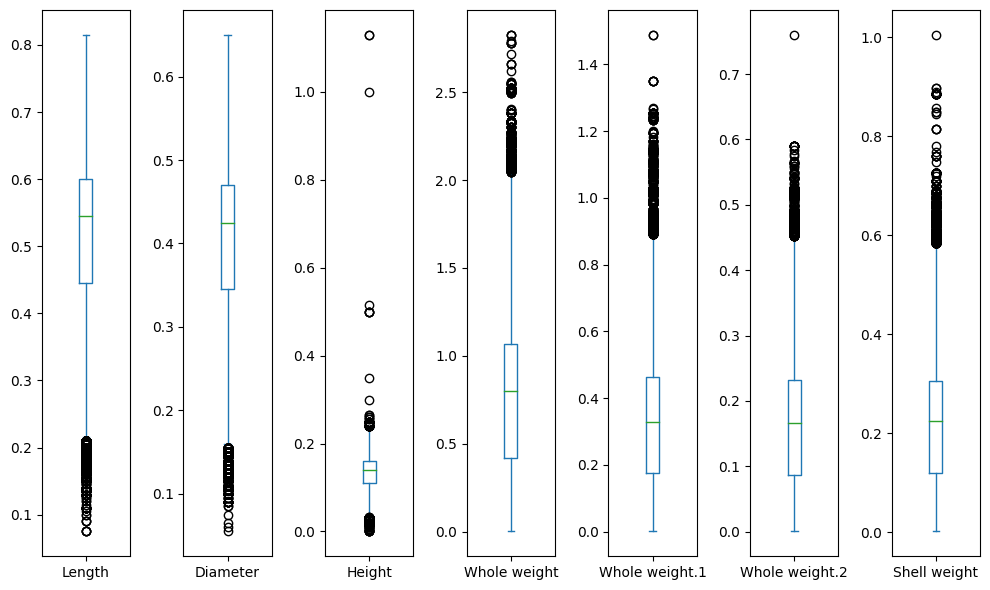

In [ ]:
df.select_dtypes(include='float64').plot(kind='box',subplots=True,figsize=(10,6))
plt.tight_layout();

In [ ]:
# define function to cap outliers
def cap_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    capped_column = np.clip(column, lower_bound, upper_bound)
    return capped_column

# select columns to cap outliers
cols_to_cap = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']
# cap outliers for selected columns
for col in cols_to_cap:
    df[col] = cap_outliers(df[col])

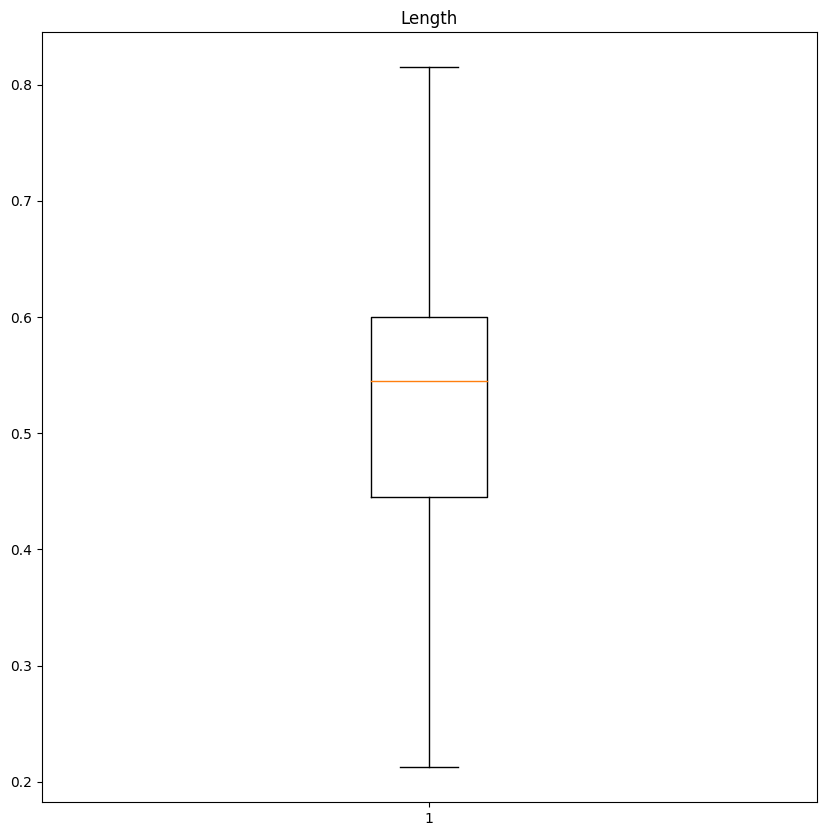

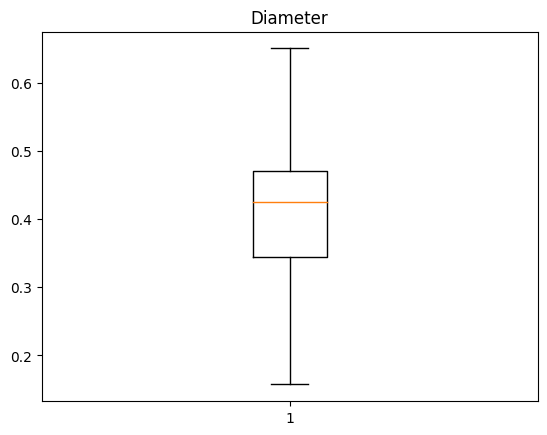

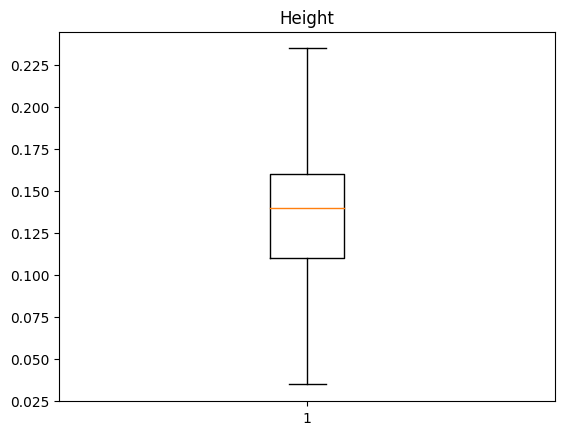

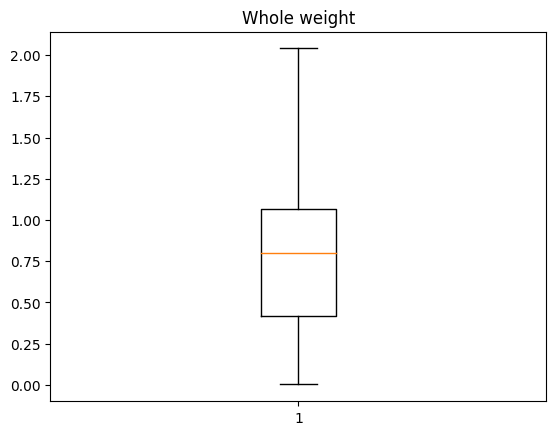

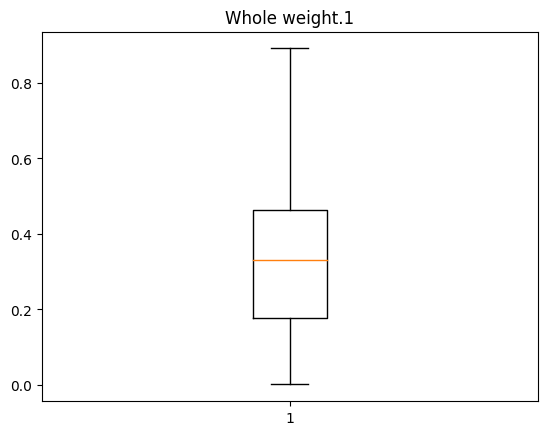

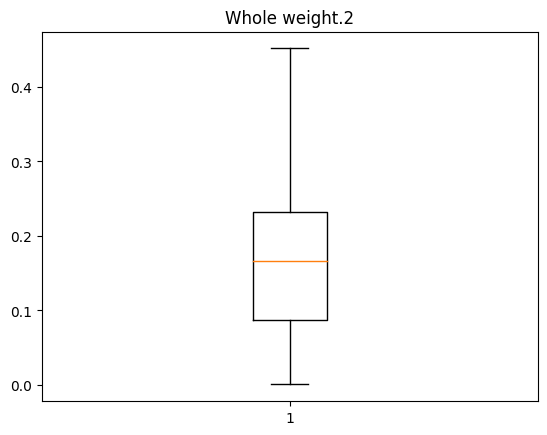

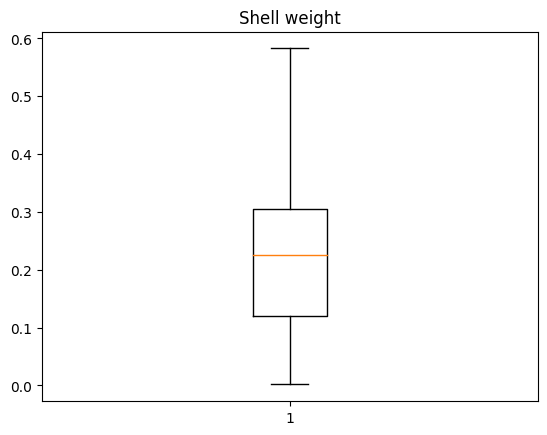

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure object
fig = plt.figure()

#Data visualization after replacing outliers
fig.set_size_inches(10,10)
for col in cols_to_cap:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
df = pd.get_dummies(df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df,validate_df = train_test_split(data, test_size=0.2)

In [ ]:
category_columns = ['Sex']
Numerical_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

In [ ]:
train_df[category_columns] = train_df[category_columns].apply(lambda x: x.cat.codes)
validate_df[category_columns] = validate_df[category_columns].apply(lambda x: x.cat.codes)

train_X = train_df[category_columns + Numerical_columns]
train_y = train_df['Rings']

validate_X = validate_df[category_columns + Numerical_columns]
validate_y = validate_df['Rings']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
forest = RandomForestClassifier(100, min_samples_leaf=5)
forest.fit(train_X, train_y)

mean_absolute_error(validate_y, forest.predict(validate_X))
r2_score(validate_y, model.predict(validate_X))

0.6394242367909545

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(train_X, train_y)

mean_absolute_error(validate_y, model.predict(validate_X))
r2_score(validate_y, model.predict(validate_X))

0.5891298744653064

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, min_child_weight=5)
model.fit(train_X, train_y)

mean_absolute_error(validate_y, model.predict(validate_X))
r2_score(validate_y, model.predict(validate_X))

0.64992162928933

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, min_samples_leaf=5)
model.fit(train_X, train_y)

mean_absolute_error(validate_y, model.predict(validate_X))
r2_score(validate_y, model.predict(validate_X))

0.6394242367909545